<a href="https://colab.research.google.com/github/PraeJi/Python-Practice/blob/main/build_supervised_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Supervised Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

# Conduct exploratory data analysis (EDA)

In [3]:
# display the entire dataset
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Calculate summary statistics
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


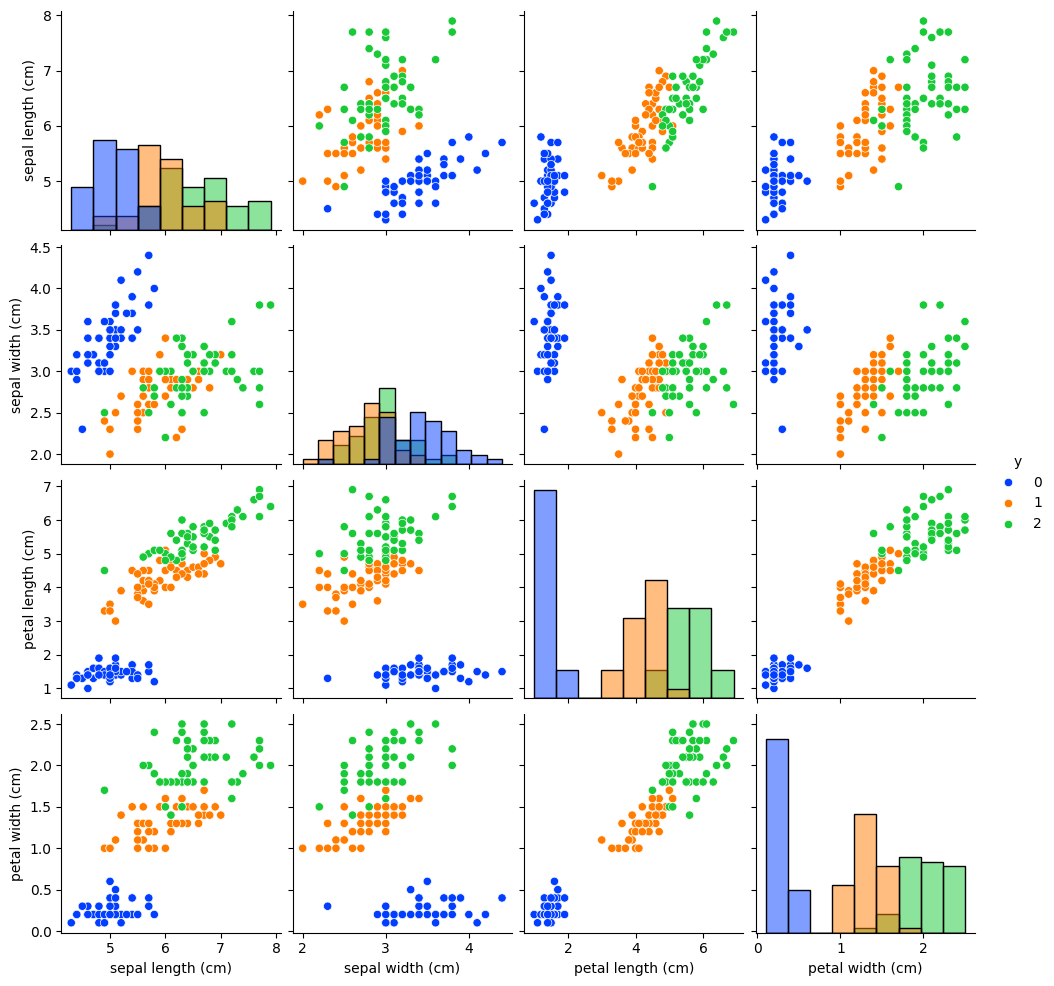

In [5]:
df = X.copy(deep=True)
df['y'] = y
res = sns.pairplot(df, hue='y', diag_kind='hist', palette='bright')

<Axes: >

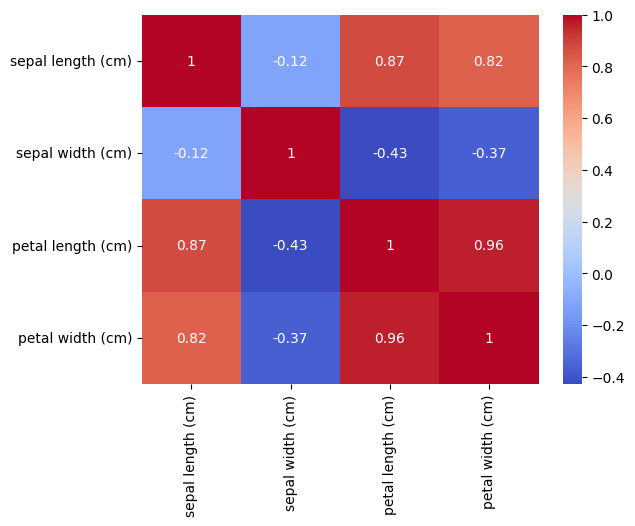

In [6]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

<Axes: >

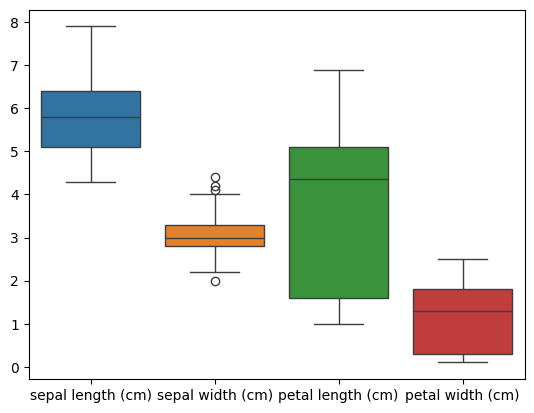

In [7]:
sns.boxplot(X)

# Split the dataset into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)


In [9]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


# Round 1

## Preprocess the train set

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_train_scaled[:5]

array([[ 0.80347326, -0.53881591,  0.45445264,  0.37946604],
       [ 1.04344393, -1.25723711,  1.13159715,  0.76937609],
       [ 1.16342927, -0.05986843,  0.96231102,  1.15928615],
       [-0.8763215 ,  1.13750025, -1.35126605, -1.18017419],
       [ 0.20354656, -1.97565832,  0.68016748,  0.37946604]])

## Choose and train an estimator

In [14]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
model1.coef_

array([[-1.03088233,  0.9999741 , -1.74271845, -1.62179093],
       [ 0.671348  , -0.40758618, -0.36686902, -0.72611895],
       [ 0.35953433, -0.59238792,  2.10958747,  2.34790988]])

## Evaluate the estimator

In [17]:
acc_train1 =  model1.score(X_train_scaled, y_train)
print(f"Training accuracy: {acc_train1:.4f}")

Training accuracy: 0.9732


# Round 2

## Preprocess the trining set

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)

## Choose and train an estimator

In [19]:
model2 = LogisticRegression()
model2.fit(X_train_scaled2, y_train)

LogisticRegression()

In [20]:
acc_train2 =  model2.score(X_train_scaled2, y_train)
print(f"Training accuracy: {acc_train2:.4f}")

Training accuracy: 0.9196


# Round 3

## Choose and train an estimator

In [21]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Evaluate the estimator

In [22]:
acc_train3 =  model3.score(X_train, y_train)
print(f"Training accuracy: {acc_train3:.4f}")

Training accuracy: 0.9821


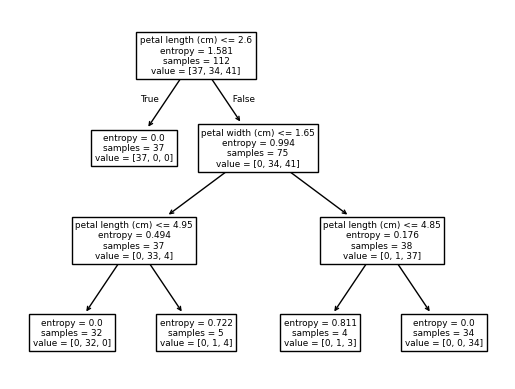

In [23]:
from sklearn.tree import plot_tree

res = plot_tree(model3, feature_names=X.columns)

# Apply preprocessing to the test set

In [ ]:
# None

# Assess estimator performance on the test set

In [24]:
acc_test3 = model3.score(X_test, y_test)
print(f"Test accuracy: {acc_test3:.4f}")

Test accuracy: 0.9737


# Predict labels of the test examples

In [25]:
y_pred = model3.predict(X_test)

# Scatter Plot

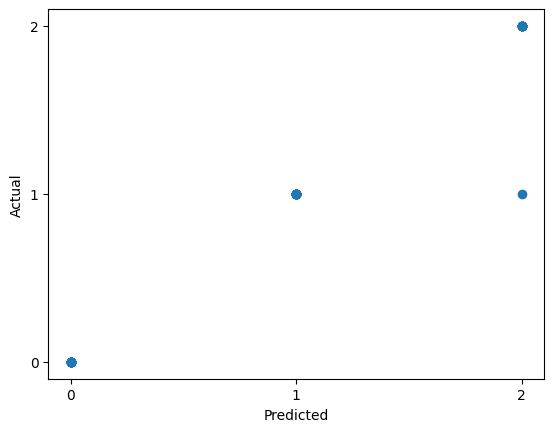

In [27]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.show()

# Confusion Matrix

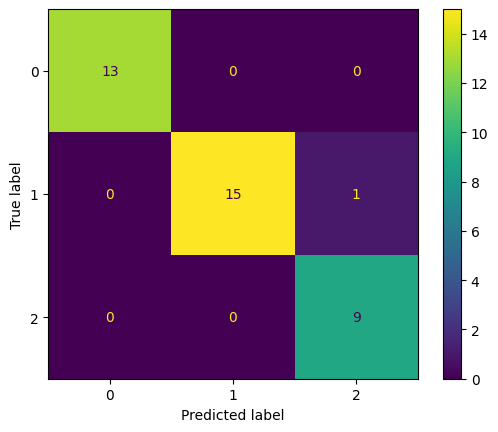

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot()
plt.show()